In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import pandas as pd
df = pd.read_csv('../../codes/artbench/ArtBench-10.csv')
df['path'] = df.apply(lambda x: "../../codes/artbench/data/artbench-10-imagefolder/{}/{}".format(x['label'], x['name']), axis=1)
df.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
0,frank-omeara_towards-night-and-winter.jpg,frank-omeara,https://uploads5.wikiart.org/00316/images/fran...,True,800,657,impressionism,train,43186,../../codes/artbench/data/artbench-10-imagefol...
1,goldstein-grigoriy_morning.jpg,goldstein-grigoriy,https://uploads5.wikiart.org/images/grigoriy-g...,True,521,499,impressionism,train,41151,../../codes/artbench/data/artbench-10-imagefol...
2,georges-lemmen_man-reading.jpg,georges-lemmen,https://uploads6.wikiart.org/images/georges-le...,True,800,612,impressionism,train,9754,../../codes/artbench/data/artbench-10-imagefol...
3,theodor-aman_port-of-constantza-1882.jpg,theodor-aman,https://uploads6.wikiart.org/images/theodor-am...,True,560,336,impressionism,train,44244,../../codes/artbench/data/artbench-10-imagefol...
4,niccolo-cannicci_il-passo-della-futa-1914.jpg,niccolo-cannicci,https://uploads3.wikiart.org/images/niccolo-ca...,True,2400,2322,impressionism,train,46885,../../codes/artbench/data/artbench-10-imagefol...


In [3]:
df['label'].unique()

array(['impressionism', 'romanticism', 'expressionism', 'surrealism',
       'art_nouveau', 'renaissance', 'realism', 'post_impressionism',
       'baroque', 'ukiyo_e'], dtype=object)

In [4]:
df_val = df[(df['label'].isin(['post_impressionism', 'ukiyo_e'])) & (df['split']=='test')]
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 42015 to 59997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2000 non-null   object
 1   artist            2000 non-null   object
 2   url               2000 non-null   object
 3   is_public_domain  2000 non-null   bool  
 4   length            2000 non-null   int64 
 5   width             2000 non-null   int64 
 6   label             2000 non-null   object
 7   split             2000 non-null   object
 8   cifar_index       2000 non-null   int64 
 9   path              2000 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 158.2+ KB


In [5]:
df_val.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
42015,santiago-rusinol_terraced-garden-in-mallorca-1...,santiago-rusinol,https://uploads2.wikiart.org/images/santiago-r...,True,799,598,post_impressionism,test,1970,../../codes/artbench/data/artbench-10-imagefol...
42018,henri-edmond-cross_land-by-the-sea.jpg,henri-edmond-cross,https://uploads5.wikiart.org/images/henri-edmo...,True,1133,788,post_impressionism,test,9785,../../codes/artbench/data/artbench-10-imagefol...
42026,javad-hamidi_mader.jpg,javad-hamidi,https://uploads1.wikiart.org/00136/images/java...,False,1855,1295,post_impressionism,test,7520,../../codes/artbench/data/artbench-10-imagefol...
42044,grace-cossington-smith_figure-through-flowers-...,grace-cossington-smith,https://uploads3.wikiart.org/images/grace-coss...,False,600,445,post_impressionism,test,853,../../codes/artbench/data/artbench-10-imagefol...
42058,theo-van-doesburg_dunes-and-sea.jpg,theo-van-doesburg,https://uploads2.wikiart.org/images/theo-van-d...,True,1200,1086,post_impressionism,test,3904,../../codes/artbench/data/artbench-10-imagefol...


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_val, _ = train_test_split(df_val, train_size=1000, random_state=42, stratify=df_val['label'])
df_val['label'].value_counts()

label
ukiyo_e               500
post_impressionism    500
Name: count, dtype: int64

In [8]:
df_val.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
58519,utagawa-sadahide_171.jpg,utagawa-sadahide,https://ukiyo-e.org/image/mfa/sc166896,True,2000,1463,ukiyo_e,test,9493,../../codes/artbench/data/artbench-10-imagefol...
45032,albert-marquet_the-coffeepot-1902.jpg,albert-marquet,https://uploads4.wikiart.org/images/albert-mar...,True,1234,1024,post_impressionism,test,1379,../../codes/artbench/data/artbench-10-imagefol...
42761,mario-zanini_lerici-1950.jpg,mario-zanini,https://uploads3.wikiart.org/images/mario-zani...,False,512,399,post_impressionism,test,209,../../codes/artbench/data/artbench-10-imagefol...
58081,utagawa-toyoharu_56.jpg,utagawa-toyoharu,https://ukiyo-e.org/image/mfa/sc209846,True,2000,1426,ukiyo_e,test,8441,../../codes/artbench/data/artbench-10-imagefol...
58630,tsukioka-yoshitoshi_3091.jpg,tsukioka-yoshitoshi,https://ukiyo-e.org/image/mfa/sc137705,True,1500,998,ukiyo_e,test,9759,../../codes/artbench/data/artbench-10-imagefol...


In [9]:
import pickle

for i in [5000]:
    for j in [0.5]:
        filename = os.path.join('./data/indices/{}-{}/idx-val.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_val.index.to_list(), handle)

In [10]:
'post_impressionism'.replace("_", " ").lower()

'post impressionism'

In [11]:
df_train = df[(df['label'].isin(['post_impressionism', 'ukiyo_e'])) & (df['split']=='train')]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 42000 to 59999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              10000 non-null  object
 1   artist            10000 non-null  object
 2   url               10000 non-null  object
 3   is_public_domain  10000 non-null  bool  
 4   length            10000 non-null  int64 
 5   width             10000 non-null  int64 
 6   label             10000 non-null  object
 7   split             10000 non-null  object
 8   cifar_index       10000 non-null  int64 
 9   path              10000 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 791.0+ KB


In [12]:
for path in df_val['path']:
    # print(path)
    if os.path.isfile(path):
        pass
    else:
        print(path)
        break

In [13]:
for path in df_train['path']:
    # print(path)
    if os.path.isfile(path):
        pass
    else:
        print(path)
        break

In [14]:
df_train['label'].unique()

array(['post_impressionism', 'ukiyo_e'], dtype=object)

In [15]:
df_train.head()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
42000,henri-de-toulouse-lautrec_jane-avril-leaving-t...,henri-de-toulouse-lautrec,https://uploads1.wikiart.org/images/henri-de-t...,True,3341,2536,post_impressionism,train,25579,../../codes/artbench/data/artbench-10-imagefol...
42001,istvan-ilosvai-varga_green-quinces-1936.jpg,istvan-ilosvai-varga,https://uploads0.wikiart.org/images/istvan-ilo...,False,475,438,post_impressionism,train,44919,../../codes/artbench/data/artbench-10-imagefol...
42002,robert-spencer_flowing-water-1924.jpg,robert-spencer,https://uploads4.wikiart.org/images/robert-spe...,True,879,749,post_impressionism,train,35092,../../codes/artbench/data/artbench-10-imagefol...
42003,lois-mailou-jones_brother-brown-1931.jpg,lois-mailou-jones,https://uploads4.wikiart.org/00315/images/lois...,False,600,437,post_impressionism,train,20368,../../codes/artbench/data/artbench-10-imagefol...
42004,louis-hayet_evening-in-paris.jpg,louis-hayet,https://uploads6.wikiart.org/00329/images/loui...,True,2880,1953,post_impressionism,train,39730,../../codes/artbench/data/artbench-10-imagefol...


In [16]:
df_train.tail()

,name,artist,url,is_public_domain,length,width,label,split,cifar_index,path
59994,yoshifuji_128.jpg,yoshifuji,https://ukiyo-e.org/image/famsf/5131162228180055,True,900,629,ukiyo_e,train,462,../../codes/artbench/data/artbench-10-imagefol...
59995,utagawa-hiroshige-ii_579.jpg,utagawa-hiroshige-ii,https://ukiyo-e.org/image/famsf/5050161212750078,True,900,607,ukiyo_e,train,19424,../../codes/artbench/data/artbench-10-imagefol...
59996,utagawa-hiroshige_11968.jpg,utagawa-hiroshige,https://ukiyo-e.org/image/famsf/5050161207490054,True,1220,825,ukiyo_e,train,48260,../../codes/artbench/data/artbench-10-imagefol...
59998,toyohara-chikanobu_3078.jpg,toyohara-chikanobu,https://ukiyo-e.org/image/famsf/7255324240550041,True,1220,613,ukiyo_e,train,27420,../../codes/artbench/data/artbench-10-imagefol...
59999,utagawa-hiroshige-iii_793.jpg,utagawa-hiroshige-iii,https://ukiyo-e.org/image/famsf/7224328201820041,True,1220,675,ukiyo_e,train,27253,../../codes/artbench/data/artbench-10-imagefol...


In [17]:
for i in [5000
         ]:
    for j in [0.5]:
        if i<len(df_train):
            df_train_, _ = train_test_split(df_train, train_size=i, 
                                        random_state=42, 
                                        stratify=df_train['label'])
        else:
            df_train_ = df_train.copy()
            
        print(len(df_train_))
        ####
        filename = os.path.join('./data/indices/{}-{}/idx-train.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_train_.index.to_list(), handle)
        ####
        count = 0
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-val/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1
        print(count)
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-test/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1 
        print(count)
        ####
        for k in range(1024):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/retrain/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1   
        print(count)

5000
256
512
1536


In [18]:
with open('./data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [19]:
with open('./data/indices/5000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

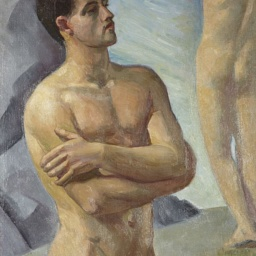

In [20]:
from datasets import DatasetDict, Dataset, load_dataset, Image

train_dataset = Dataset.from_dict({"image": df.loc[idx_train]['path'].tolist(),
                                   "label": df.loc[idx_train]['label'].tolist(),
                                  }).cast_column("image", Image())
train_dataset[0]["image"]

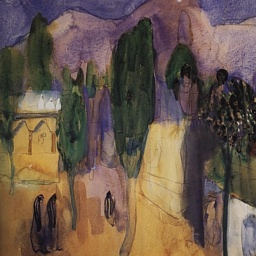

In [21]:
train_dataset[1]["image"]

In [22]:
train_dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 'post_impressionism'}

In [23]:
dataset = DatasetDict({"train":train_dataset,
                       })
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5000
    })
})

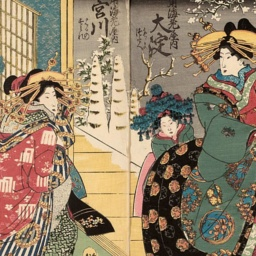

In [24]:
val_dataset = Dataset.from_dict({"image": df.loc[idx_val]['path'].tolist(),
                                   "label": df.loc[idx_val]['label'].tolist(),
                                  }).cast_column("image", Image())
val_dataset[0]["image"]

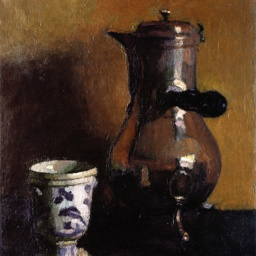

In [25]:
val_dataset[1]["image"]

In [26]:
val_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})